In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\shail\Downloads\innings_deliveries.csv")

In [3]:
df.head(6)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
5,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,6,0,6,NaN,NaN,[]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

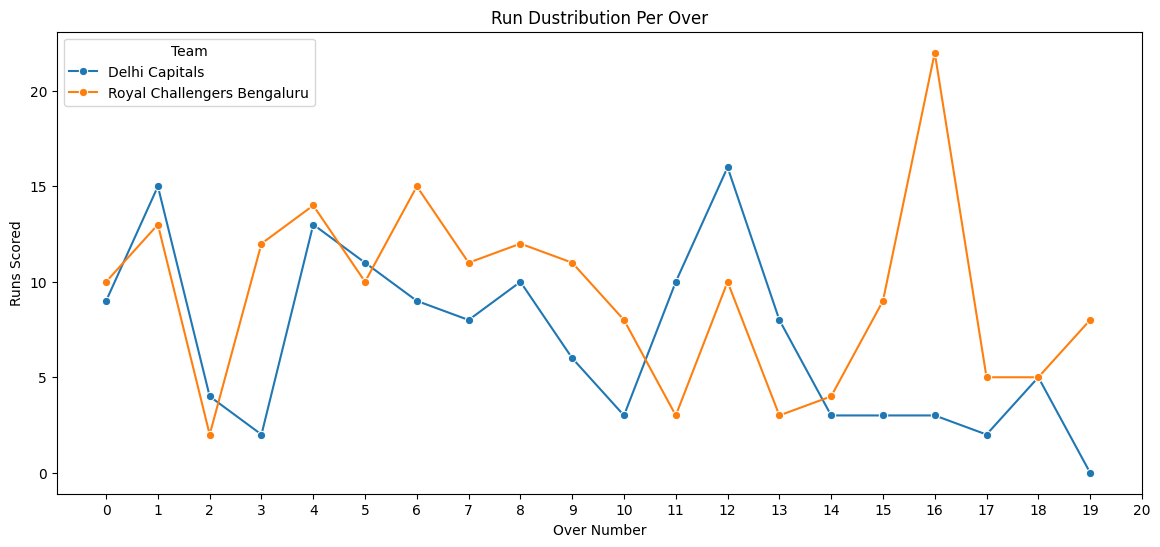

In [5]:
run_distribution = df.groupby(['team', 'over']).agg({'runs_total':'sum'}).reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data = run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Dustribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0,21))
plt.legend(title='Team')
plt.show()
sns.set_style("whitegrid")

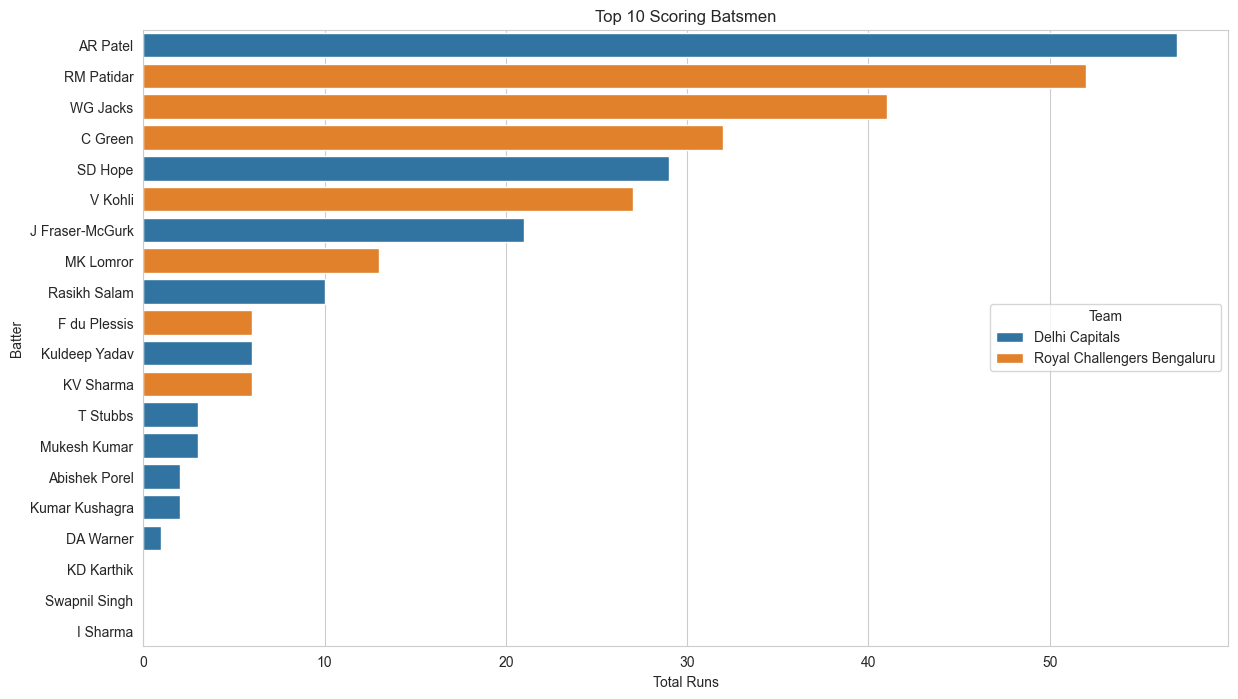

In [6]:
top_scorers = df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by = 'runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)

plt.title('Top 10 Scoring Batsmen')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

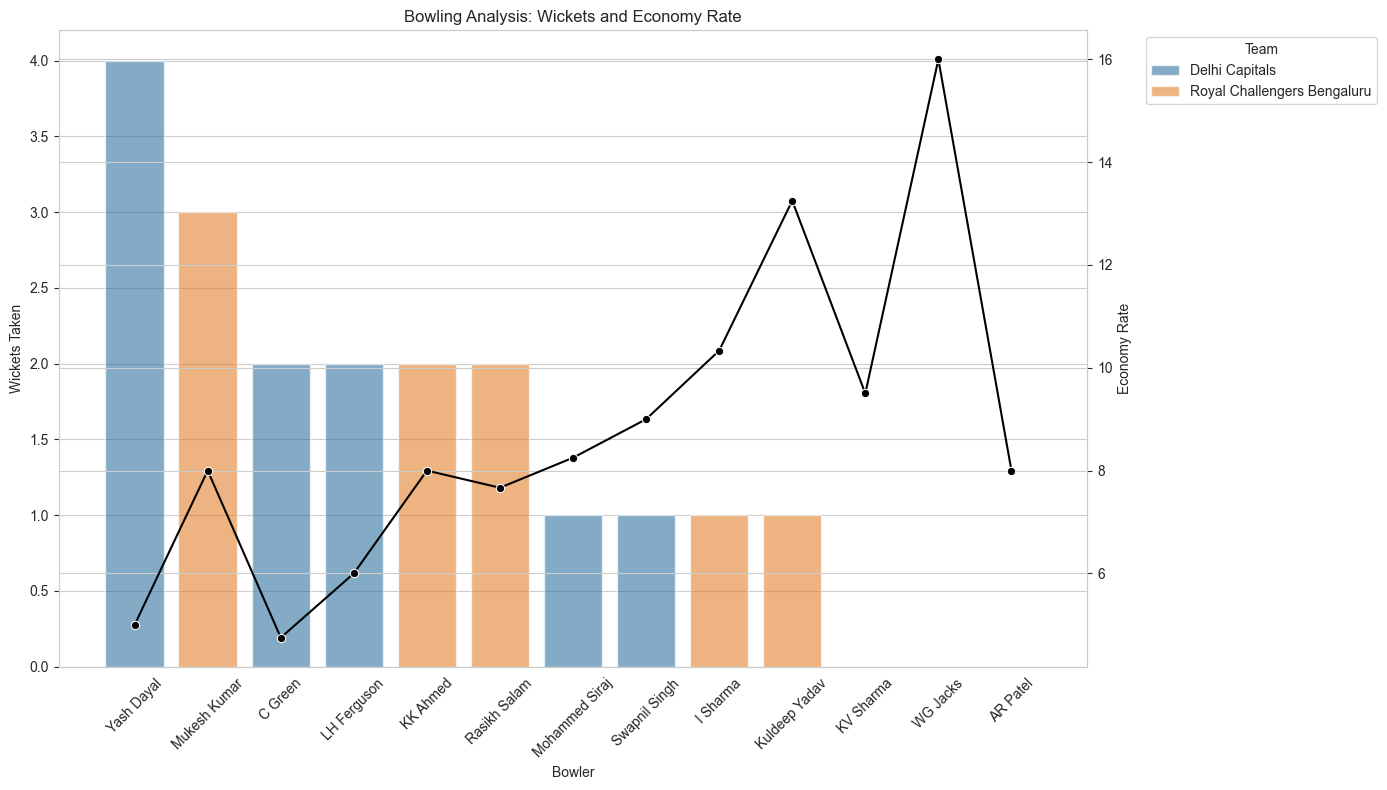

In [7]:
df['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()


bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']


bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)


bowling_stats_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)


fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

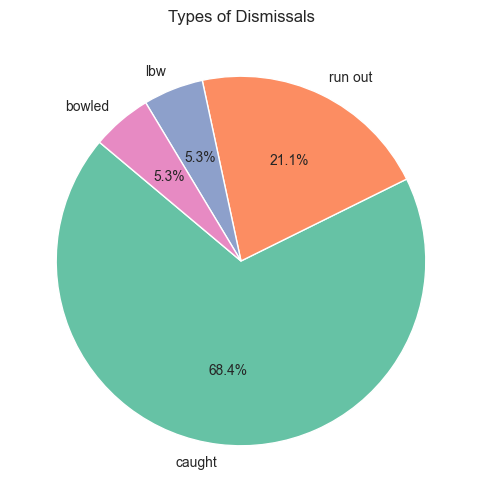

In [8]:
dismissal_types = df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(10, 6))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct= '%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')

plt.show()


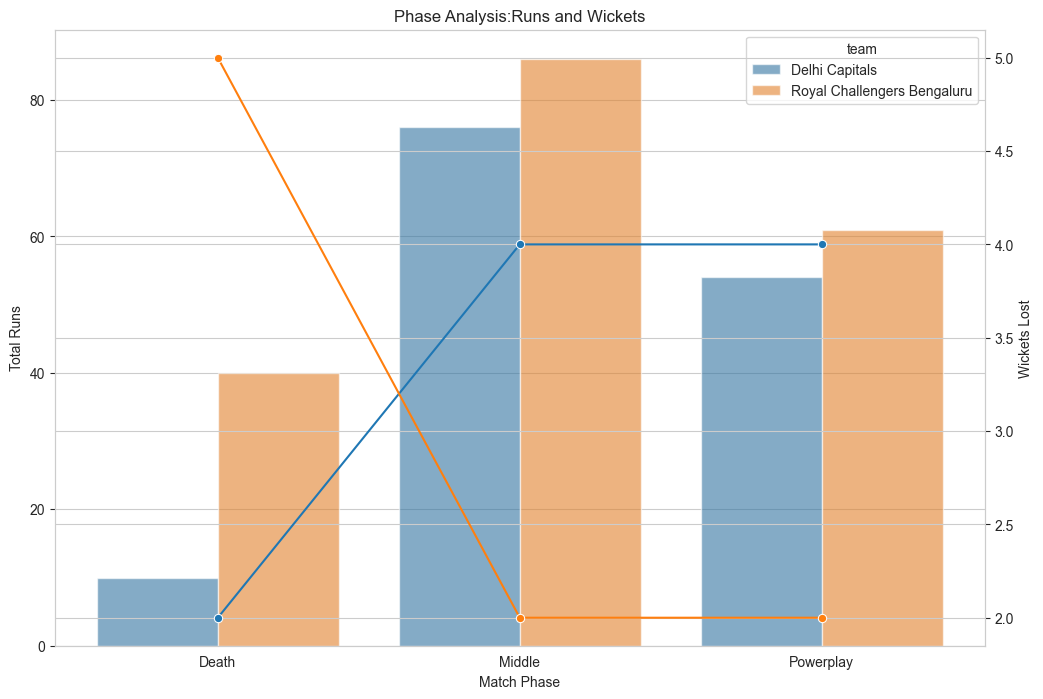

In [9]:
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

df['phase'] = df['over'].apply(classify_phase)

phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'})
phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

fig, ax1 = plt.subplots(figsize=(12,8))

sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1, alpha=0.6)
ax1.set_title('Phase Analysis:Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue ='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [10]:
batter_stats = df.groupby('batter').agg({'runs_batter': 'sum','over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced'])*100

batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


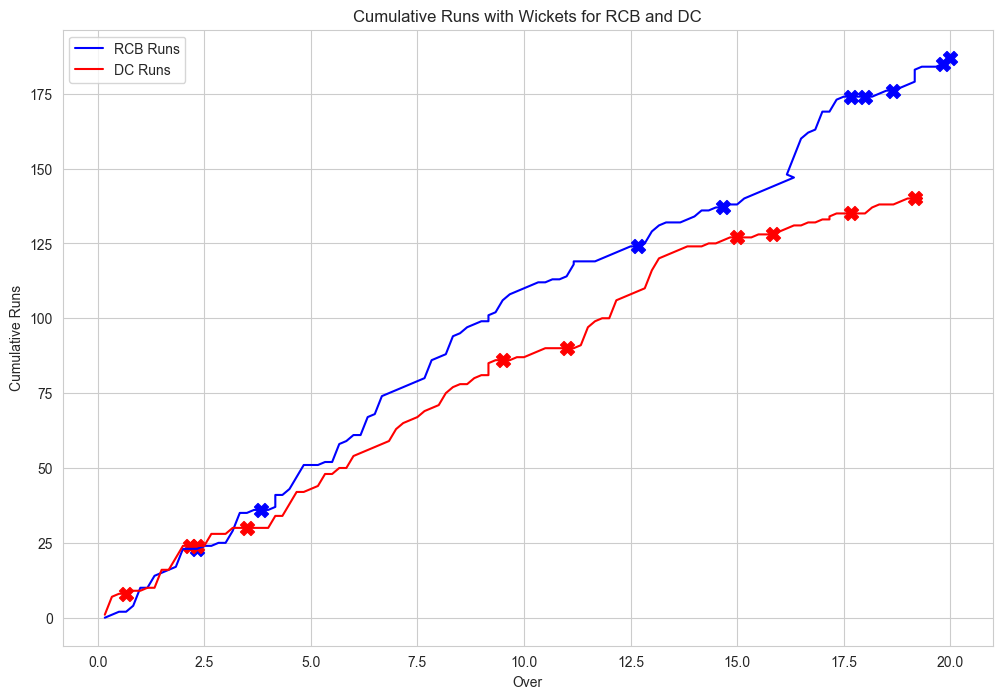

In [16]:
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] = df.groupby('team')['wickets_taken'].cumsum()


rcb = df[df['team'] == 'Royal Challengers Bengaluru'].copy()
dc = df[df['team'] == 'Delhi Capitals'].copy()

rcb['over_ball'] = rcb['over'] + (rcb.groupby('over').cumcount() + 1) / 6
dc['over_ball'] = dc['over'] + (dc.groupby('over').cumcount() + 1) / 6

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(rcb['over_ball'], rcb['cumulative_runs'], color='blue', label='RCB Runs')
ax1.scatter(rcb[rcb['wickets_taken'] == 1]['over_ball'], rcb[rcb['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

ax1.plot(dc['over_ball'], dc['cumulative_runs'], color='red', label='DC Runs')
ax1.scatter(dc[dc['wickets_taken'] == 1]['over_ball'], dc[dc['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax1.set_title('Cumulative Runs with Wickets for RCB and DC')
ax1.set_xlabel('Over')
ax1.set_ylabel('Cumulative Runs')
ax1.legend()
plt.show()

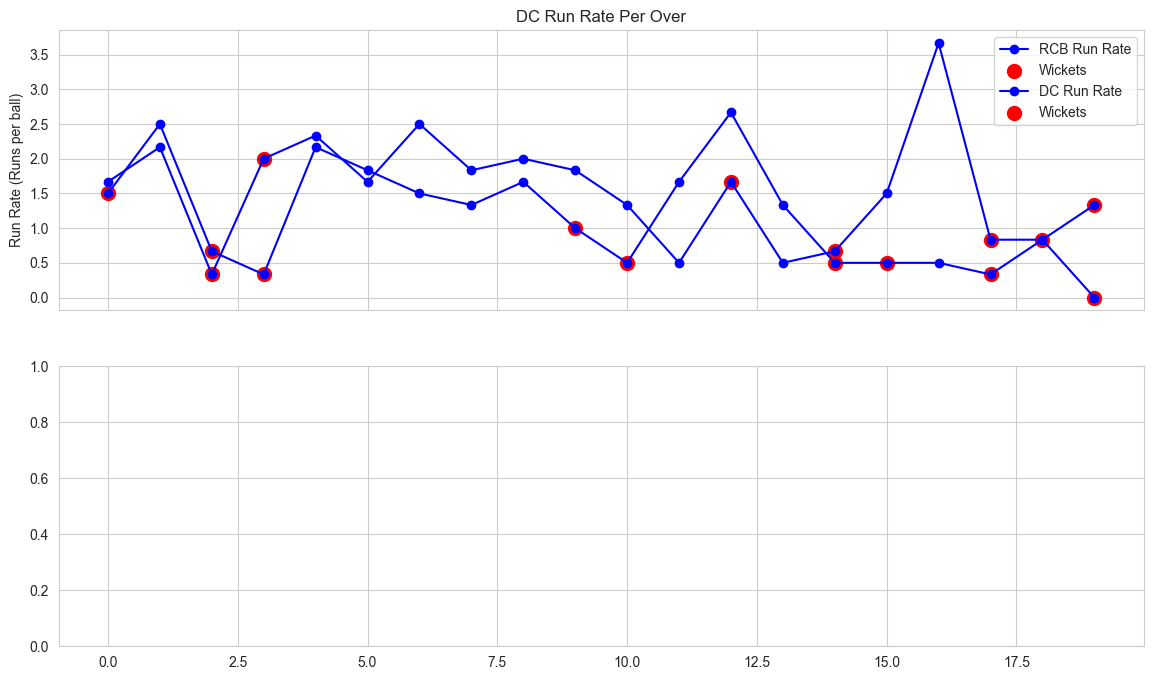

In [18]:
per_over_stats = df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken' : 'sum'}).reset_index()

per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)

rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken']>0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken']>0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

ax1.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='blue', label='DC Run Rate')
ax1.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken']>0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken']>0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('DC Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

plt.show()